In [5]:
from google.colab import files
uploaded = files.upload()


Saving Student_Performance.csv to Student_Performance.csv


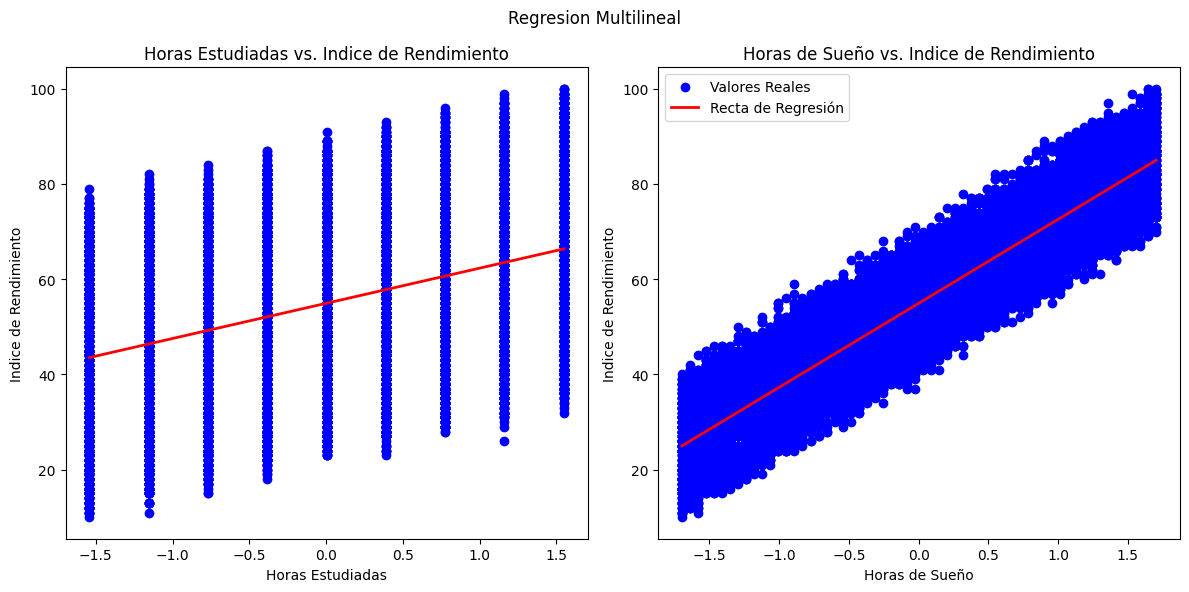

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Funciones para el cálculo
def calcular_Costo(X, y, theta):
    m = len(y)
    h = np.dot(X, theta)
    error = h - y
    costo = (1 / (2 * m)) * np.sum(error ** 2)
    return costo

def calcular_r2(y_real, y_pred):
    sst = np.sum((y_real - np.mean(y_real)) ** 2)
    ssr = np.sum((y_real - y_pred) ** 2)
    r2 = 1 - (ssr / sst)
    return r2

def calcular_MSE(y_real, y_pred):
  return np.mean((y_pre-y_real)**2)

def descenso_gradiente(X, y, theta, cx, iteraciones):
    m = len(y)
    costo_historia = np.zeros(iteraciones)

    for i in range(iteraciones):
        theta = theta - (cx / m) * (X.T.dot(X.dot(theta) - y))
        costo_historia[i] = calcular_Costo(X, y, theta)

    return theta, costo_historia

# Lectura del archivo y preprocesamiento de datos
df = pd.read_csv("Student_Performance.csv")
df_norm = df.copy()

#Normalizacion de columnas
df_norm['Hours Studied'] = (df['Hours Studied'] - df['Hours Studied'].mean()) / df['Hours Studied'].std()
df_norm['Previous Scores'] = (df['Previous Scores'] - df['Previous Scores'].mean()) / df['Previous Scores'].std()
df_norm['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df_norm['Sleep Hours'] = (df['Sleep Hours'] - df['Sleep Hours'].mean()) / df['Sleep Hours'].std()
df_norm['Sample Question Papers Practiced'] = (df['Sample Question Papers Practiced'] - df['Sample Question Papers Practiced'].mean()) / df['Sample Question Papers Practiced'].std()

#Asignar Objetivo y Características
X = df_norm[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
X = np.c_[np.ones((X.shape[0], 1)), X]  # Agregar columna de unos para el término de sesgo (bias)
y = df_norm['Performance Index'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuración de parámetros e hiperparámetros
cx = 0.03
iteraciones = 1000
theta_inicial = np.zeros((X.shape[1], 1))

# Llamada a la función de descenso de gradiente
theta, costo = descenso_gradiente(X_train, y_train, theta_inicial, cx, iteraciones)

# Cálculo de valores predichos y métricas
y_pred = X_test.dot(theta)

# Gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Regresion Multilineal')
axs[0].scatter(X[:, 1], y, color='blue', label='Valores Reales')
axs[0].set_xlabel("Horas Estudiadas")
axs[0].set_ylabel("Indice de Rendimiento")
axs[0].set_title("Horas Estudiadas vs. Indice de Rendimiento")

# Dibujar la recta de regresión
x_values = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
y_values = theta[0] + theta[1] * x_values
axs[0].plot(x_values, y_values, color='red', linewidth=2, label='Recta de Regresión')
plt.legend()

axs[1].scatter(X[:, 2], y, color='blue', label='Valores Reales')
axs[1].set_xlabel("Horas de Sueño")
axs[1].set_ylabel("Indice de Rendimiento")
axs[1].set_title("Horas de Sueño vs. Indice de Rendimiento")

# Dibujar la recta de regresión
x_values = np.linspace(X[:, 2].min(), X[:, 2].max(), 100)
y_values = theta[0] + theta[2] * x_values
axs[1].plot(x_values, y_values, color='red', linewidth=2, label='Recta de Regresión')
plt.legend()
plt.tight_layout()
plt.show()